##### Author: Sanjib Lamichhane

##### Project Status: In Progress

## Import Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [2]:
# import data from github repo
df = pd.read_csv("https://raw.githubusercontent.com/sanjiblamichhane/SL_Sentiment_Analysis_On_Customer_Discovery/master/data/clean_interview.csv")

In [3]:
## preview dataframe
df.head()

,Date,Interviewee,Profession,Medium,Notes
0,9/20/2021,NaN,Marine Biologist Shellfish Management,In-Person,"Jennifer is in charge of permits, regulations ..."
1,9/9/2021,NaN,President CEO,In-Person,Their farm is located in Maryland Chesapeake B...
2,9/9/2021,NaN,Electronics Design Technician,Video Conference,"They use cables to transmit power and data, he..."
3,9/9/2021,NaN,Owner,Video Conference,"They raised Tilapia fish indoor, in a controll..."
4,9/9/2021,NaN,Owner,Video Conference,She took eggs indoor and hatched them controll...


# Exploratory Data Analysis

In [4]:
## let's look at the dimension of the data
df.shape

(35, 5)

In [5]:
## print all columns
df.columns

Index(['Date', 'Interviewee', 'Profession', 'Medium', 'Notes'], dtype='object')

- we noticed there're 5 columns
- each column is referred as 'Object' datatype

## General Information About DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         35 non-null     object 
 1   Interviewee  0 non-null      float64
 2   Profession   35 non-null     object 
 3   Medium       35 non-null     object 
 4   Notes        34 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.5+ KB


- Date is 'object' data-type. Need to change to datatime format
- Interviewee is float64. The real names of Interviewee were dropped. So Let's randomly generate some name for each interviewee.

In [7]:
## change the column type of date
df["Date"] = pd.to_datetime(df["Date"])

https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python 

In [8]:
## check the updated datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         35 non-null     datetime64[ns]
 1   Interviewee  0 non-null      float64       
 2   Profession   35 non-null     object        
 3   Medium       35 non-null     object        
 4   Notes        34 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ KB


In [9]:
##
df.describe()

,Interviewee
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


##  Sorting

In [10]:
## sort by date
df.sort_values(by='Date', ascending = True).head()

,Date,Interviewee,Profession,Medium,Notes
34,2021-08-03,NaN,Pacific Northwest Laboratory,Video Conference,TBD
33,2021-08-05,NaN,"Director, Navigation and Civil Works Decision",Video Conference,"attribute to improvement in Navigation, Dredgi..."
31,2021-08-06,NaN,UW locatizaltion,In-Person,TBD
32,2021-08-06,NaN,Diving Officer,Video Conference,Monday Aug 9th at 2pm
30,2021-08-11,NaN,Associate Director,Video Conference,Discuss acoustic technology in commercialization.


## Change Data Type of Text

In [11]:
## pull texts from the data
text = df['Notes']

In [ ]:
## 
print(text)

0     Jennifer is in charge of permits, regulations ...
1     Their farm is located in Maryland Chesapeake B...
2     They use cables to transmit power and data, he...
3     They raised Tilapia fish indoor, in a controll...
4     She took eggs indoor and hatched them controll...
5     The fish was raised as bait for other fisherme...
6     Eagle and birds took 70% of the stock, he was ...
7     Explained that it is important to look into im...
8     They use a side scan sonar to detect where fis...
9     They raise trout and Bass, they have 10tanks w...
10    Fish are raised in 'raceways' or tanks, there ...
11    They use a side scan sonar to detect where fis...
12    Bob described how he keeps baby shellfish in h...
13    Described Integrated multi-trophic aquaculture...
14                                                  NaN
15    Showed us a transponder created by her student...
16          Divers take underwater images on BOP reefs.
17                                 Micromodem is

In [12]:
## convert object datatype to string
text = str(text)

In [13]:
## check the type of text data again
type(text)

str

## Create a Word Cloud

In [14]:
!python --version

Python 3.7.12


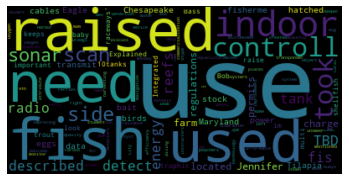

In [44]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(max_font_size=120).generate(text)

## display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [52]:
## save the image file
img = wordcloud.to_file("./img/word_cloud.png")

!pwd

/content


# Sentiment Analysis

In [55]:
from textblob import TextBlob

In [56]:
##
blob = TextBlob(text)

In [57]:
##
sentiment = blob.sentiment.polarity ## -1 to 1
print(sentiment)

0.030102040816326527


- This text is slightly positive and more closer to a neutral tone.